# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FCTR


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
PM.review_universe('UV_WTR')
#PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'path': 'data'}

In [8]:
#PM.review_universe('UV_FUND')
PM.review_portfolio('TDF_2406', universe=True)

{'universe': 'fund',
 'file': 'funds_prices',
 'tickers': 'funds_info',
 'freq': 'daily',
 'batch_size': 100,
 'check_master': True,
 'path': 'data'}

In [9]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250411.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [4]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FNDM, UV_FCTR


In [5]:
WidgetUniverse

## K200

In [6]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-04-29 uploaded.
Price data loaded


In [7]:
#k200.portfolio_data
#k200.get_names()

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-04-30 downloaded.
kospi200_prices_250430.csv saved
df_prices updated
Execution time of download: 28 secs


## KRX

In [9]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [9]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-04-29 uploaded.
Price data loaded


In [10]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [11]:
#PM.review_universe('UV_WTR')

In [12]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-04-30 downloaded.
etfs_weather_250430.csv saved
df_prices updated
Execution time of download: 1 secs


In [14]:
#wtr.save()

## FCTR

In [6]:
tickers = ['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
fctr = PM.create_universe('UV_FCTR', tickers=tickers)

7 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded


In [7]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2022-01-03 to 2025-03-25 downloaded.
etfs_factors_250325.csv saved
df_prices updated
Execution time of download: 2 secs


## FUND

In [15]:
fund = PM.create_universe('UV_FUND')
fund_names = fund.get_names()

22 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded


In [16]:
portfolios_fund = ['TDF','HANA','SAVE']
pm = PM(*portfolios_fund, verbose=False)
tickers = pm.util_asset_tickers()
#tickers = None

TDF_2406: done
HANA_2408: done
SAVE_2503: done
SAVE_2504: done


In [17]:
# FISA
tickers = tickers + ['K55107BB0404','KR5101888398','K55210CO3737','KR5236AS4826','KR5370AP9949','KR5236AS4818']
len(tickers)

25

In [19]:
kw = dict(
    start_date = '2024-06-01', 
    #close_today = WidgetUniverse.values(1),
    tickers = tickers,
    timeout = 5
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 315 funds loaded.
23 tickers set to download


100%|███████████████████████████████████████████████████████████████| 23/23 [00:28<00:00,  1.25s/it]

... done
23 securities from 2023-03-29 to 2025-04-30 downloaded.
ERROR: failed to save as funds_prices_250430.csv exists
Execution time of download: 29 secs


In [20]:
_ = fund.save()

funds_prices_250430.csv saved


In [16]:
#fund.portfolio_data['universe']

### Master

In [6]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_cat.tail()

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
K55210CO3760,신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류C-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55210CO3737,신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55105CK1667,삼성한국형TDF2050증권투자신탁UH[주식혼합-재간접형]Ae,삼성증권,일반,삼성,주식혼합,TDF,글로벌
KR5370AP9949,AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae,삼성증권,일반,AB,채권,채권,글로벌
KR5236AS4818,한국밸류10년투자증권투자신탁 1(주식)종류C-E,삼성증권,일반,한국밸류,주식,주식,국내


In [7]:
# daily
freq, batch_size = 'daily', 100
file_master = 'funds_info'
file_history = 'funds_prices'

In [10]:
# monthly
freq, batch_size = 'monthly', 24
file_master = 'fundm_info'
file_history = 'fundm_prices'

In [11]:
kw = dict(
    freq=freq, batch_size=batch_size,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*Check missing tickers in category*

In [12]:
df = fd.data_tickers.copy()
tkrs = df_cat.index.difference(df.index)
tkrs.nunique()

0

In [45]:
# uncomment to update data_tickers with category
fd.data_tickers = pd.concat([df, df_cat.loc[tkrs, 'name']])

In [46]:
overwrite=False
#overwrite=True # update all conversion data
fd.update_master(overwrite=overwrite)

100%|███████████████████████████████████████████████████████████████| 14/14 [00:01<00:00,  8.22it/s]


1.7 secs elapsed, 0.0 secs paused (0.0%)


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.12it/s]


0.2 secs elapsed, 0.0 secs paused (0.0%)
fundm_info_250501.csv saved


### Monthly

In [13]:
fund = PM.create_universe('UV_FNDM')

313 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 315 funds loaded.
Price data loaded


In [14]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    append=True # download new tickers to update existing data
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 315 funds loaded.
Update existing data with 2 tickers
2 tickers set to download


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:19<00:00,  9.57s/it]

... done
315 securities from 2005-01-31 to 2025-03-31 downloaded.
fundm_prices_250331c_250331.csv saved
df_prices updated
Execution time of download: 19 secs


In [51]:
_ = fund.save()

fundm_prices_250430.csv saved


### Cost

*Check missing cost data*

In [12]:
universe = 'UV_FUND'
#universe = 'UV_FNDM'

In [13]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250425.csv loaded
22 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [14]:
fund = PM.create_universe(universe)
fd = FundDownloader.create(fund)
fd.export_cost(universe, file_cost, path=path_tran, update=True)
#fd.export_cost(universe)

22 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded
Master data for 315 funds loaded.
Cost data transaction_cost_250425.csv loaded
Cost data saved to transaction_cost_250501.csv


### Direct

In [4]:
file_master = 'funds_info_250325'
file_history = 'funds_prices_250326.csv'
kw = dict(
    freq='daily', batch_size=100,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*check missing tickers*

In [5]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

#cond = df_cat['seller'] == '기업은행'
#cond = cond & (df_cat['account'] == '일반')
#tickers = df_cat.index[cond]
tickers = df_cat.index
tickers.difference(fd.data_tickers.index)

Index([], dtype='object', name='ticker')

In [15]:
tickers = None
fd.set_tickers(tickers=tickers)

242 tickers set to download


In [ ]:
start_date, end_date = '2024-01-01', '2025-03-25'
_ = fd.download(start_date, end_date)

In [17]:
fd.df_prices.columns.size

232

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [4]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

232 securities from 2023-03-27 to 2025-04-02 uploaded.
Data for 242 funds loaded.
Price data loaded
Cost data transaction_cost_250408.csv loaded


In [6]:
import random
#tickers = [k for k,v in fund.security_names.items() if 'TDF2045' in v]
tickers = random.sample(list(fund.security_names.keys()), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
#tickers = ['K55307DH1659', 'K55210E77483']

In [7]:
fund.get_names(tickers)

0) K55101E95247: 한국투자미국장기국채증권자투자신탁UH(채권-재간접형)(C-Pe)
1) K55232BU5739: NH-Amundi국채10년인덱스증권자투자신탁[채권]Class C-P1e(연금저축)
2) KR5235AK9774: 피델리티차이나컨슈머증권자투자신탁(주식-재간접형)종류PRS-e

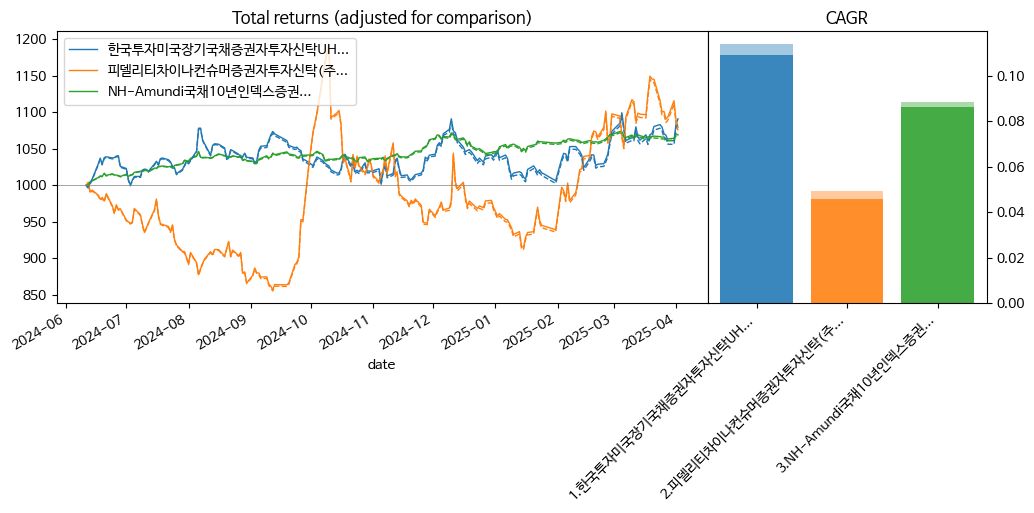

In [8]:
fund.plot(tickers, fee=fee, base=1000)

## LIQ

In [17]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [18]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-04-29 uploaded.
Price data loaded


In [19]:
#liq.get_names()

In [20]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.31it/s]

1.7 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2022-01-03 to 2025-04-30 downloaded.
krx_liq_prices_250430.csv saved
df_prices updated
Execution time of download: 2 secs


## Additional Data

### Cost

*Check missing cost data*

In [35]:
#universe = 'UV_FUND'
universe = 'UV_FNDM'

In [36]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250424.csv loaded
300 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 300 funds loaded.
Price data loaded


### Financial Ratio

In [4]:
WidgetUniverse

In [5]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-04-25 loaded


In [6]:
start_fr = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start_fr, **kw)

In [7]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [8]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-04-25 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-04-25
Price: 2022-01-03 ~ 2025-04-25


# Performance

In [17]:
PM.review()

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, SAVE_2504, FISA_2504, FCTR


In [5]:
pfs = ['MMT', 'PER', 'WTR']
pm = PM(*pfs, **kw_cost)

MMT_2407:
200 securities from 2022-01-03 to 2025-04-30 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-16 loaded

PER_2410:
200 securities from 2022-01-03 to 2025-04-30 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets

PER_2505:
200 securities from 2022-01-03 to 2025-04-30 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
REMINDER: make sure this is 1st transaction as no records provided

WTR_2407:
6 securities from 2022-01-03 to 2025-04-30 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-02-13 loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-04-30 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-12-18 loaded



In [23]:
#pm.load('LIQ')
#pm.load('TDF_2406','HANA_2408')

security_names updated
Data of tickers 009900, 016380 downloaded


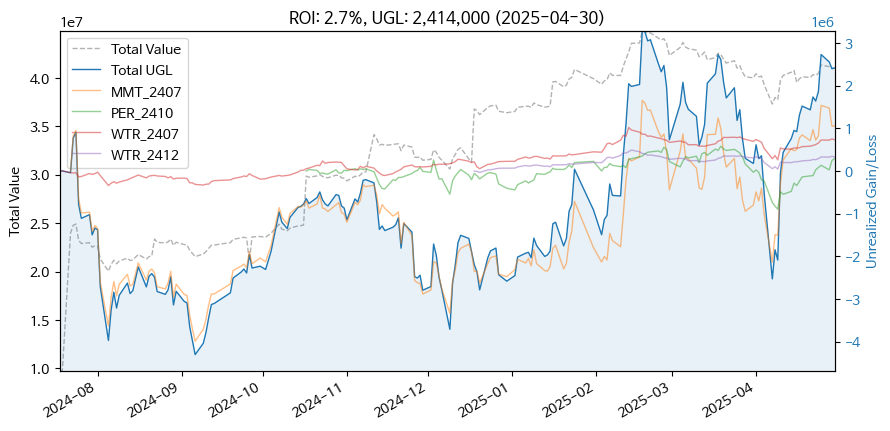

In [6]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=False)

In [7]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [8]:
pm.summary(date=w_date.value)

,MMT_2407,PER_2410,WTR_2407,WTR_2412,TOTAL
start,2024-07-22,2024-10-17,2024-07-18,2024-12-18,2024-07-18
end,2025-04-30,2025-04-30,2025-04-30,2025-04-30,2025-04-30
buy,"60,564,104","12,250,266","10,365,708","5,783,443","88,963,522"
sell,"46,784,778","2,617,050","942,797",0.0,"50,344,625"
value,"14,832,300","9,928,790","10,155,828","6,115,774","41,032,692"
ugl,"1,052,973","295,574","732,917","332,331","2,413,795"
roi,0.017386,0.024128,0.070706,0.057462,0.027132


*print summary for google sheet 금융자산운용*

In [9]:
pm.util_print_summary(date=w_date.value)

2025-04-30, MMT, 2407, , , , 평가, , 60564104, 46784778, 14832300, 1052973, 0.017386096261370554
2025-04-30, PER, 2410, , , , 평가, , 12250266, 2617050, 9928790, 295574, 0.024127996641532645
2025-04-30, WTR, 2407, , , , 평가, , 10365708, 942797, 10155828, 732917, 0.0707059383218227
2025-04-30, WTR, 2412, , , , 평가, , 5783443, 0.0, 6115774, 332331, 0.05746241116547446


### All Funds

In [6]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, verbose=True)

TDF_2406:
23 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded
Transaction record to 2025-04-21 loaded

HANA_2408:
23 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded
Transaction record to 2024-08-01 loaded

SAVE_2503:
23 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded
Transaction record to 2025-03-17 loaded

SAVE_2504:
23 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded
Transaction record to 2025-04-21 loaded

FISA_2504:
23 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded
Transaction record to 2025-04-29 loaded



In [7]:
pm.summary()

,TDF_2406,HANA_2408,SAVE_2503,SAVE_2504,FISA_2504,TOTAL
start,2024-06-19,2024-08-01,2025-03-17,2025-04-21,2025-04-28,2024-06-19
end,2025-04-30,2025-04-30,2025-04-30,2025-04-30,2025-04-30,2025-04-30
buy,"48,148,612","9,990,000","7,067,714","3,584,916","31,000,000","99,791,242"
sell,0.0,0.0,0.0,0.0,0.0,0.0
value,"47,298,299","10,253,657","7,028,581","3,588,365","31,028,228","99,197,130"
ugl,"-850,313","263,657","-39,133","3,449","28,228","-594,112"
roi,-0.01766,0.026392,-0.005537,0.000962,0.000911,-0.005954


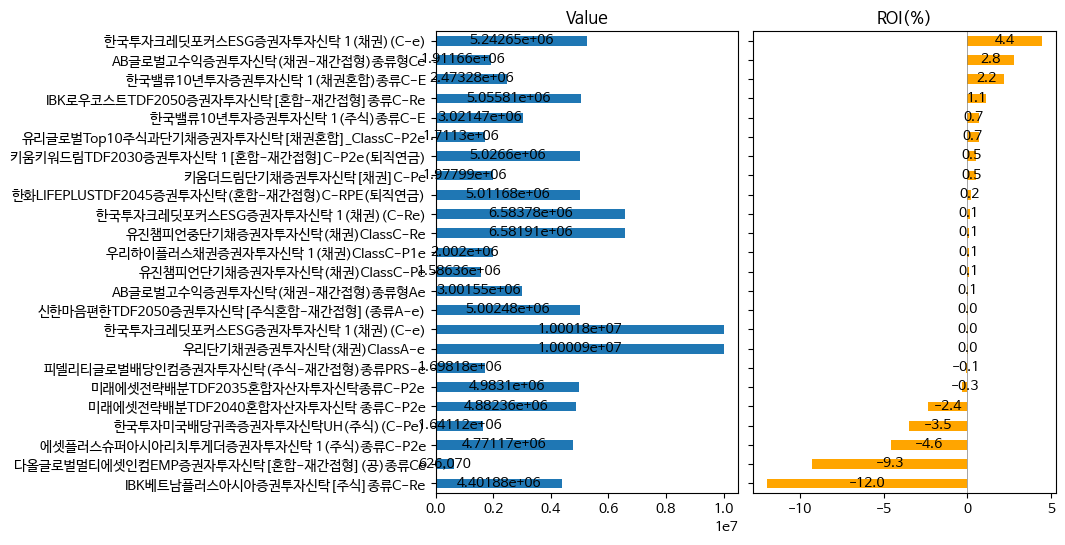

In [8]:
pm.assets(plot=True, sort_by='roi', roi=True, figsize=(8,6))

# Transaction

## MMT

In [26]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-04-30 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-16 loaded


In [62]:
# run after editting record file
pf_mmt.update_record()

In [63]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-03-14 000150           두산  340250            9    9     0.2    0.193   
           003230         삼양식품  923000           -1    3     0.2    0.175   
           010120  LS ELECTRIC  208500          -14    0     0.0    0.000   
           012450    한화에어로스페이스  751000           -1    3     0.2    0.189   
           042660         한화오션   76550           45   45     0.2    0.217   
           064350         현대로템  108300           33   33     0.2    0.225   
           267260     HD현대일렉트릭  356500           -9    0     0.0    0.000   
           298040        효성중공업  473000           -7    0     0.0    0.000   
2025-04-16 000150           두산  271999           -9    0     0.0    0.000   
           003230         삼양식품  932000            0    3     0.2    0.196   
           012450    한화에어로스페이스  788000            0    3     0.2    0.165   
           042660         한화오션   78099           -6   39     0.2    0.213   
           064350         현대로템  109200           -4   29     0.2    0.222   
           329180      HD현대중공업  364000            8    8     0.2    0.204   

                       date*  
date       ticker             
2025-03-14 000150 2025-03-17  
           003230 2025-03-17  
           010120 2025-03-17  
           012450 2025-03-17  
           042660 2025-03-17  
           064350 2025-03-17  
           267260 2025-03-17  
           298040 2025-03-17  
2025-04-16 000150 2025-04-17  
           003230 2025-04-17  
           012450 2025-04-17  
           042660 2025-04-17  
           064350 2025-04-17  
           329180 2025-04-17

*daily transactions for book keeping*

In [64]:
#pf_mmt.get_cash_history(cumsum=False, date_actual=True)

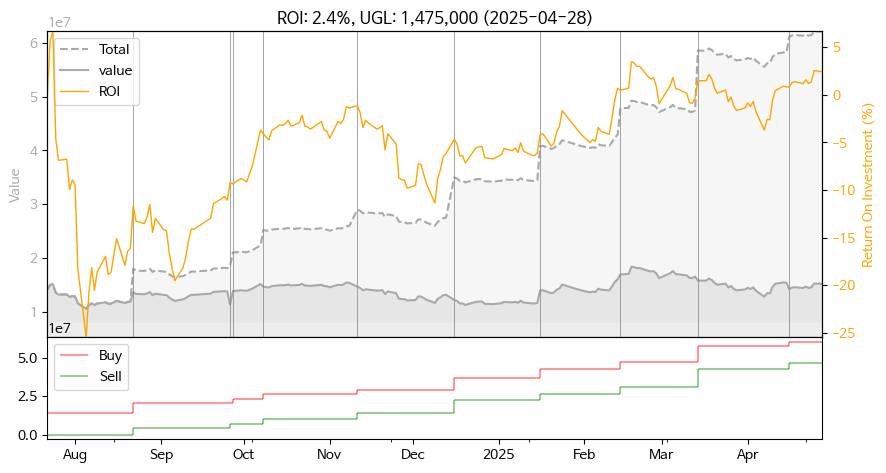

In [22]:
pf_mmt.plot(total=True)

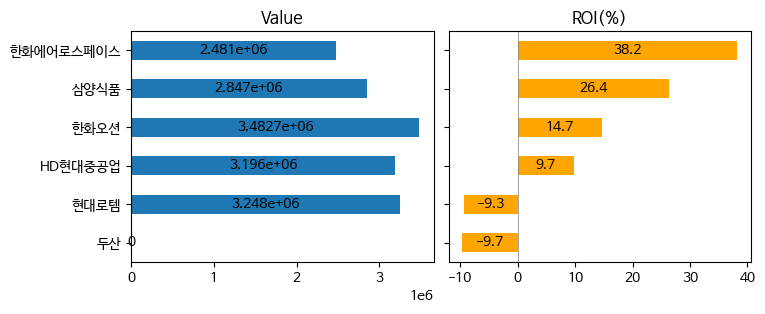

In [23]:
_ = pf_mmt.plot_assets(figsize=(8,3))

In [81]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-04-22, 60564104, 46784778, 14749200, 969873, 0.016013996383353657


start    2024-07-22
end      2025-04-22
buy      60,564,104
sell     46,784,778
value    14,749,200
ugl         969,873
roi        0.016014
dtype: object

In [82]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [83]:
kw = dict(
    #sell = ['010120'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_mmt.transaction_halt(**kw) 

Updated with transaction on 2025-04-21
Set save=True to save transaction record
ROI: 1.6%, UGL: 969,873 (2025-04-22)


In [73]:
date_actual='2025-05-16'

kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    #capital = 0.15,
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)

_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-04-15 to 2025-04-14
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 4 %
ROI: 1.6%, UGL: 951,358 (2025-04-22)
Set save=True to save transaction record


In [74]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                         
2025-04-16 000150         두산  271999           -9    0     0.0    0.000   
           003230       삼양식품  932000            0    3     0.2    0.196   
           012450  한화에어로스페이스  788000            0    3     0.2    0.165   
           042660       한화오션   78099           -6   39     0.2    0.213   
           064350       현대로템  109200           -4   29     0.2    0.222   
           329180    HD현대중공업  364000            8    8     0.2    0.204   
2025-04-21 003230       삼양식품  957000            0    3     0.2    0.207   
           012450  한화에어로스페이스  830000            0    3     0.2    0.179   
           042660       한화오션   77900           -2   37     0.2    0.208   
           064350       현대로템  113000           -4   25     0.2    0.203   
           329180    HD현대중공업  352000            0    8     0.2    0.203   

                       date*  
date       ticker             
2025-04-16 000150 2025-04-17  
           003230 2025-04-17  
           012450 2025-04-17  
           042660 2025-04-17  
           064350 2025-04-17  
           329180 2025-04-17  
2025-04-21 003230 2025-05-16  
           012450 2025-05-16  
           042660 2025-05-16  
           064350 2025-05-16  
           329180 2025-05-16

## KRX
*simulation*

In [40]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

ERROR: No 'KRX'. select one of MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [ ]:
pf_krx.view_record(-2)

In [ ]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [24]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-04-25 loaded


In [25]:
pf = 'PER_2410'
#pf = 'PER_2505'

pf_per = PM.create_portfolio(pf, df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-04-28 uploaded.
Price data loaded
Cost data transaction_cost_250425.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets


*Set assets to liquidate as delisted from KOSPI200*

In [26]:
tickers_liq = pf_per.check_universe()

In [27]:
pf_per.view_record(-1)

name     ratio  transaction     net  weight  weight*  \
date       ticker                                                            
2024-11-11 010060   OCI홀딩스  1.006689      -358800  478400    0.05    0.050   
           003030   세아제강지주  0.994309      -773200  386600    0.05    0.040   
           009970  영원무역홀딩스  0.997666      -514200  428500    0.05    0.045   
           016380     KG스틸  1.001517      -514020  500840    0.05    0.052   
           047040     대우건설  0.993122      -461645  508900    0.05    0.053   
           088350     한화생명  1.001745       515700  515700    0.05    0.054   
           078930       GS  1.002404       499200  499200    0.05    0.052   
           111770     영원무역  0.996264       481800  481800    0.05    0.050   
           139130  DGB금융지주  1.004848       519750  519750    0.05    0.054   
           005830   DB손해보험  1.016838       427600  427600    0.05    0.044   
           001450     현대해상  1.000000       505750  505750    0.05    0.053   
           009900     명신산업  1.008715       495720  495720    0.05    0.052   
           241560     두산밥캣  0.995000       520000  520000    0.05    0.054   
           000270       기아  1.010684       468000  468000    0.05    0.049   
           024110     기업은행  1.002059       509950  509950    0.05    0.053   
           005850      에스엘  1.014354       501600  501600    0.05    0.052   
           316140   우리금융지주  1.001244       514560  514560    0.05    0.054   
           138930  BNK금융지주  1.003181       518650  518650    0.05    0.054   
           005380      현대차  1.007160       419000  419000    0.05    0.044   
           017800   현대엘리베이  1.084233       416700  416700    0.05    0.043   

                       date*  
date       ticker             
2024-11-11 010060 2024-11-11  
           003030 2024-11-11  
           009970 2024-11-11  
           016380 2024-11-11  
           047040 2024-11-11  
           088350 2024-11-11  
           078930 2024-11-11  
           111770 2024-11-11  
           139130 2024-11-11  
           005830 2024-11-11  
           001450 2024-11-11  
           009900 2024-11-11  
           241560 2024-11-11  
           000270 2024-11-11  
           024110 2024-11-11  
           005850 2024-11-11  
           316140 2024-11-11  
           138930 2024-11-11  
           005380 2024-11-11  
           017800 2024-11-11

In [8]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
start, end, buy, sell, value, ugl, roi
2024-10-17, 2025-04-25, 12250266, 2617050, 9768420, 135204, 0.011036852168723188


start    2024-10-17
end      2025-04-25
buy      12,250,266
sell      2,617,050
value     9,768,420
ugl         135,204
roi        0.011037
dtype: object

In [9]:
#pf_per.update_record()
#pf_per.view_record(-2)

security_names updated
Data of tickers 009900, 016380 downloaded


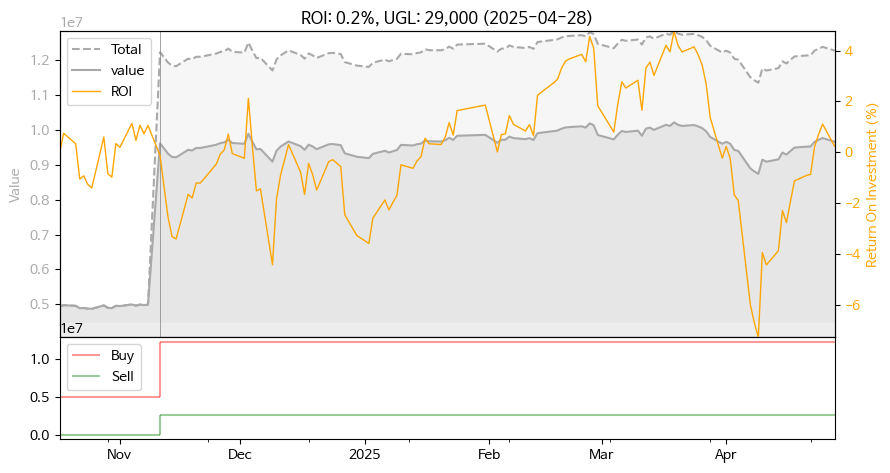

In [28]:
pf_per.plot()

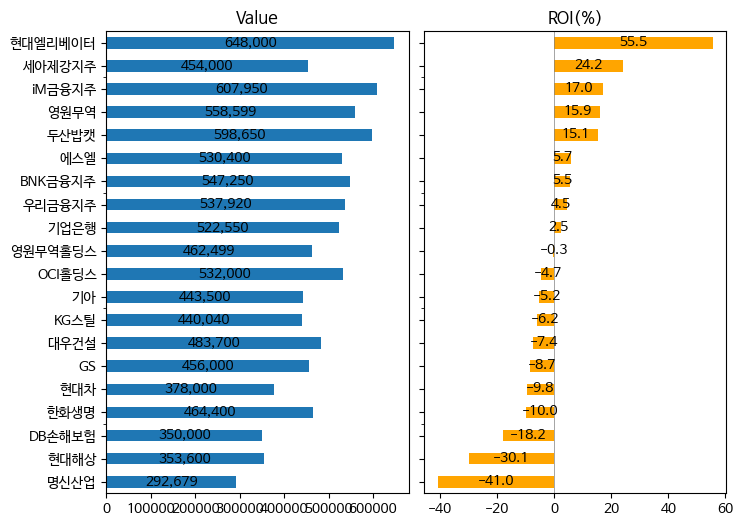

In [29]:
_ = pf_per.plot_assets(figsize=(8,6))

In [12]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning missing tickers


In [7]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [8]:
kw = dict(
    sell = {'009900': 300000, '016380': 450000},
    #halt = tickers_liq, # testing
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_per.transaction_halt(**kw) 

REMINDER: For the sell price, use the total amount, not the unit price.
Updated with transaction on 2025-04-25
security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
Set save=True to save transaction record
ROI: 1.2%, UGL: 141,585 (2025-04-25)


In [9]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-04-25 000270       기아   88200            0    5    0.05    0.049   
           001450     현대해상   20800            0   17    0.05    0.039   
           003030   세아제강지주  231500            0    2    0.05    0.051   
           005380      현대차  188800            0    2    0.05    0.042   
           005830   DB손해보험   87400            0    4    0.05    0.039   
           005850      에스엘   33800            0   16    0.05    0.060   
           009900     명신산업     599         -500    0    0.05    0.000   
           009970  영원무역홀딩스   94400            0    4    0.05    0.052   
           010060   OCI홀딩스   68100            0    8    0.05    0.060   
           016380     KG스틸     909         -494    0    0.05    0.000   
           017800   현대엘리베이   71900            0    9    0.05    0.072   
           024110     기업은행   14970            0   35    0.05    0.058   
           047040     대우건설    3375            0  140    0.05    0.052   
           078930       GS   38350            0   12    0.05    0.051   
           088350     한화생명    2580            0  180    0.05    0.051   
           111770     영원무역   47200            0   11    0.05    0.063   
           138930  BNK금융지주   10570            0   55    0.05    0.064   
           139130  DGB금융지주    9710            0   63    0.05    0.068   
           241560     두산밥캣   46350            0   13    0.05    0.067   
           316140   우리금융지주   17300            0   32    0.05    0.061   

                       date*  
date       ticker             
2025-04-25 000270 2025-04-25  
           001450 2025-04-25  
           003030 2025-04-25  
           005380 2025-04-25  
           005830 2025-04-25  
           005850 2025-04-25  
           009900 2025-04-25  
           009970 2025-04-25  
           010060 2025-04-25  
           016380 2025-04-25  
           017800 2025-04-25  
           024110 2025-04-25  
           047040 2025-04-25  
           078930 2025-04-25  
           088350 2025-04-25  
           111770 2025-04-25  
           138930 2025-04-25  
           139130 2025-04-25  
           241560 2025-04-25  
           316140 2025-04-25

In [23]:
#date_actual='2025-11-12'
date_actual='2025-05-12'
kw = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True,
    date_actual = date_actual
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2025-02-25 to 2025-04-25
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 4 %
ROI: -0.0%, UGL: -526.1001764405519 (2025-04-25)
Set save=True to save transaction record


In [24]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-04-25 010060   OCI홀딩스   68100           11   11    0.05    0.052   
           047040     대우건설    3375          222  222    0.05    0.052   
           078930       GS   38350           19   19    0.05    0.050   
           088350     한화생명    2580          290  290    0.05    0.052   
           009970  영원무역홀딩스   94400            7    7    0.05    0.046   
           001450     현대해상   20800           36   36    0.05    0.052   
           005830   DB손해보험   87400            8    8    0.05    0.048   
           003030   세아제강지주  231500            3    3    0.05    0.048   
           105630     한세실업   11140           67   67    0.05    0.052   
           111770     영원무역   47200           15   15    0.05    0.049   
           000270       기아   88200            8    8    0.05    0.049   
           139130   iM금융지주    9710           77   77    0.05    0.052   
           005380      현대차  188800            3    3    0.05    0.039   
           069260   TKG휴켐스   16200           46   46    0.05    0.052   
           005850      에스엘   33800           22   22    0.05    0.051   
           024110     기업은행   14970           50   50    0.05    0.052   
           028050    삼성E&A   18940           39   39    0.05    0.051   
           316140   우리금융지주   17300           43   43    0.05    0.051   
           001430  세아베스틸지주   17640           42   42    0.05    0.051   
           241560     두산밥캣   46350           16   16    0.05    0.051   

                        date*  
date       ticker              
2025-04-25 010060  2025-05-12  
           047040  2025-05-12  
           078930  2025-05-12  
           088350  2025-05-12  
           009970  2025-05-12  
           001450  2025-05-12  
           005830  2025-05-12  
           003030  2025-05-12  
           105630  2025-05-12  
           111770  2025-05-12  
           000270  2025-05-12  
           139130  2025-05-12  
           005380  2025-05-12  
           069260  2025-05-12  
           005850  2025-05-12  
           024110  2025-05-12  
           028050  2025-05-12  
           316140  2025-05-12  
           001430  2025-05-12  
           241560  2025-05-12

In [54]:
#pf_per.update_record()

## WTR
*modified all weather*

In [14]:
# pf & rebal date
pf, date_actual = 'WTR_2407', '2025-08-14'
#pf, date_actual = 'WTR_2412', '2025-06-18'

In [15]:
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-04-25 uploaded.
Price data loaded
Cost data transaction_cost_250425.csv loaded
Transaction record to 2025-02-13 loaded


In [77]:
#pf_wtr.portfolio_data['strategy']
pf_wtr.update_record()

In [78]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-12-18 069500             KODEX 200   32313           30   30  0.1667   
           379800      KODEX 미국S&P500TR   19475           50   50  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  116220            8    8  0.1667   
           411060            ACE KRX금현물   17120           57   57  0.1667   
           148070          KOSEF 국고채10년  114072            8    8  0.1667   
           284430        KODEX 200미국채혼합   12810           77   77  0.1667   

                   weight*      date*  
date       ticker                      
2024-12-18 069500    0.168 2024-12-19  
           379800    0.168 2024-12-19  
           273130    0.161 2024-12-19  
           411060    0.169 2024-12-19  
           148070    0.163 2024-12-19  
           284430    0.171 2024-12-19

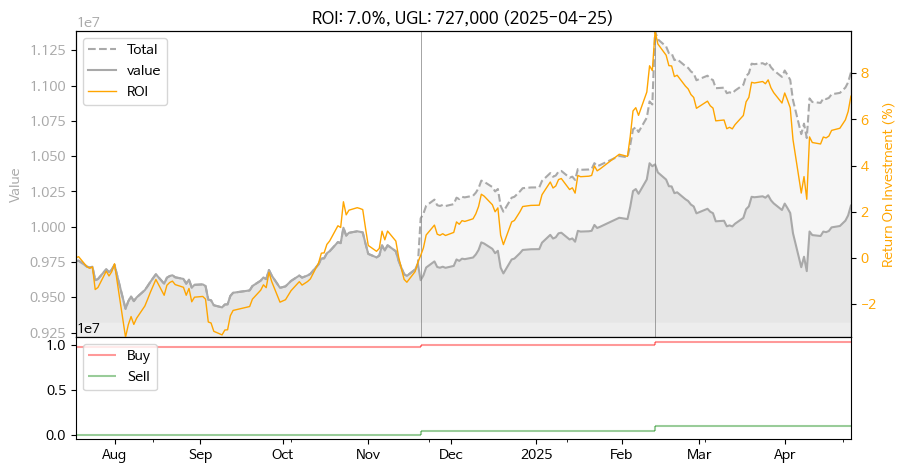

In [16]:
pf_wtr.plot(total=True)

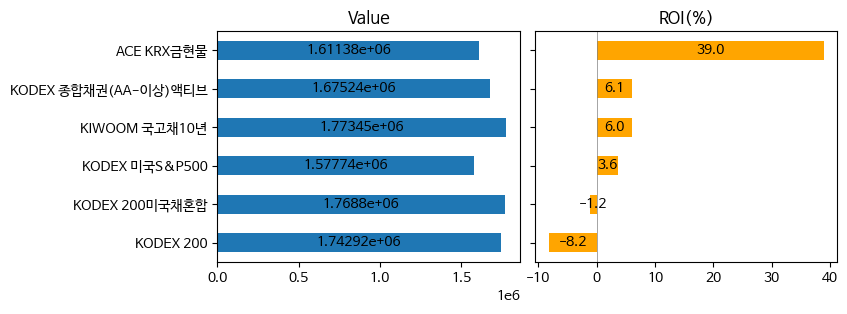

In [17]:
_ = pf_wtr.plot_assets(figsize=(8,3))

In [18]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-18, 2025-04-25, 10365708, 942797, 10149535, 726624, 0.07009884039350434


start    2024-07-18
end      2025-04-25
buy      10,365,708
sell        942,797
value    10,149,535
ugl         726,624
roi        0.070099
dtype: object

In [89]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [90]:
#pf_wtr.performance(metrics=METRICS)

In [91]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [96]:
nshares = True
kwargs = dict(
    date = WidgetTransaction.values(0),
    #capital = WidgetTransaction.values(1),
    capital = -0.1,
    save = WidgetTransaction.values(2),
    nshares = nshares,
    date_actual = date_actual
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2, nshares=nshares)

6 tickers selected by Selected from 2025-04-15 to 2025-04-15
Weights of tickers determined by Equal weights.
Rebalancing by selling 10% of the portfolio value
Mean absolute error of weights: 2 %
ROI: 5.2%, UGL: 542,148 (2025-04-15)
Set save=True to save transaction record


name   price  transaction  net  weight  \
date       ticker                                                           
2025-02-13 069500             KODEX 200   34490            1   51  0.1667   
           148070         KIWOOM 국고채10년  115030            1   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20215            0   86  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   
2025-04-15 069500             KODEX 200   33355           -6   44  0.1667   
           148070         KIWOOM 국고채10년  117325           -2   12  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  119085           -2   12  0.1667   
           284430        KODEX 200미국채혼합   12970          -19  115  0.1667   
           379800        KODEX 미국S&P500   17650           -3   84  0.1667   
           411060            ACE KRX금현물   20855           -3   71  0.1667   

                   weight*      date*  
date       ticker                      
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14  
2025-04-15 069500    0.168 2025-08-14  
           148070    0.161 2025-08-14  
           273130    0.163 2025-08-14  
           284430    0.170 2025-08-14  
           379800    0.169 2025-08-14  
           411060    0.169 2025-08-14

In [97]:
pf_wtr.valuate(total=False)

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
411060,ACE KRX금현물,2024-07-18,2025-04-15,"1,645,718","758,924","1,480,705","593,911",0.360883
148070,KIWOOM 국고채10년,2024-07-18,2025-04-15,"1,783,567","468,849","1,407,900","93,181",0.052244
273130,KODEX 종합채권(AA-이상)액티브,2024-07-18,2025-04-15,"1,579,266","238,089","1,429,020","87,842",0.055622
379800,KODEX 미국S&P500,2024-07-18,2025-04-15,"1,667,165","203,200","1,482,600","18,635",0.011178
284430,KODEX 200미국채혼합,2024-07-18,2025-04-15,"1,790,670","246,346","1,491,550","-52,775",-0.029472
069500,KODEX 200,2024-07-18,2025-04-15,"1,899,321","233,054","1,467,620","-198,647",-0.104588


## LIQ

In [81]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-04-25 uploaded.
Price data loaded
Cost data transaction_cost_250425.csv loaded
Transaction record to 2024-01-03 loaded


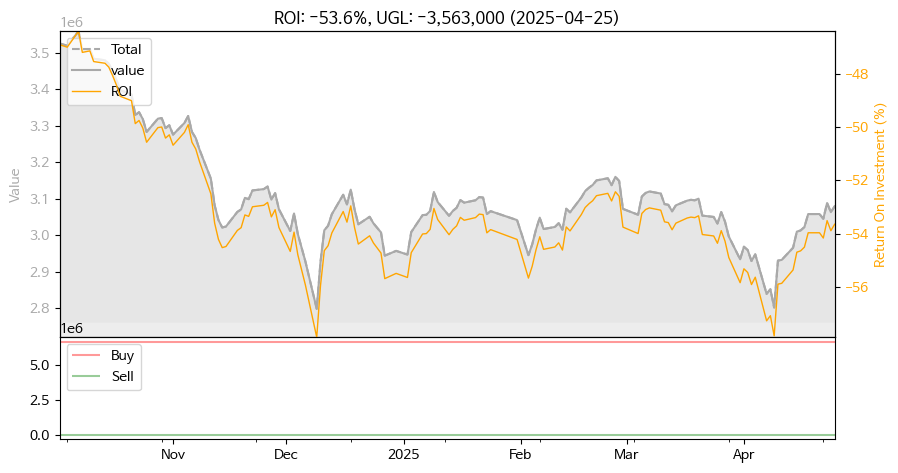

In [83]:
#date=None
date='2024-10-01'
pf_liq.plot(start_date=date)

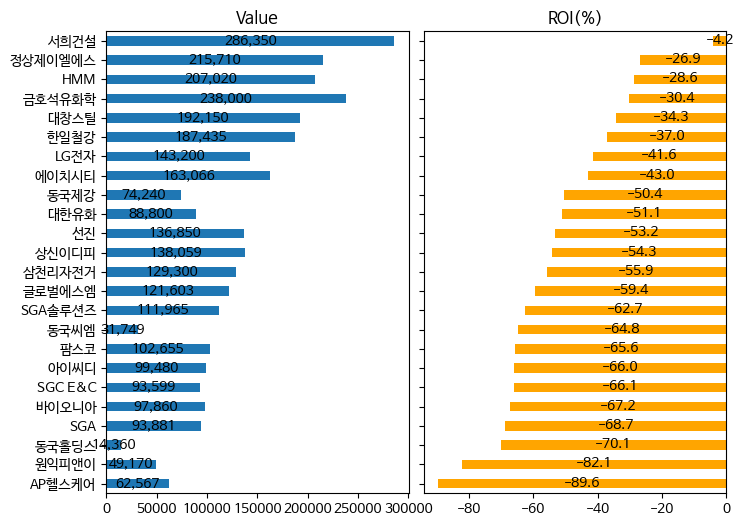

In [84]:
_ = pf_liq.plot_assets(figsize=(8,6))

In [10]:
pf_liq.valuate()

start    2024-01-03
end      2025-04-14
buy       6,642,320
sell            0.0
value     2,965,277
ugl      -3,677,043
roi       -0.553578
dtype: object

In [60]:
#pf_liq.view_record()

## IRP

In [8]:
kw_st = dict(
    security_names = fund_names
)

In [9]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, cost=file_cost)
pf_tdf.view_record(-1)

34 securities from 2023-03-29 to 2025-04-22 uploaded.
Master data for 264 funds loaded.
Price data loaded
Cost data transaction_cost_250411.csv loaded
Transaction record to 2025-04-21 loaded


name  ratio  \
date       ticker                                                             
2025-04-21 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-04-21 K55101BV9571      6574306  6574306     NaN    0.142 2025-04-21  
           K55206C95800            0  4899682  0.1429    0.106 2024-04-17  
           K55213C50702            0  4823143  0.1429    0.105 2024-04-17  
           K55214CD4825      6574306  6574306     NaN    0.142 2025-04-21  
           K55234BY9966            0  4260709  0.1429    0.092 2024-04-17  
           K55234DF3150            0  4865649  0.1429    0.105 2024-04-17  
           K55301BU6139            0  4837744  0.1429    0.105 2024-04-17  
           K55301BU6253            0  4712837  0.1429    0.102 2024-04-17  
           K55364CF7048            0  4595360  0.1429    0.100 2024-04-17

In [14]:
#pf_tdf.check_universe()

In [11]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

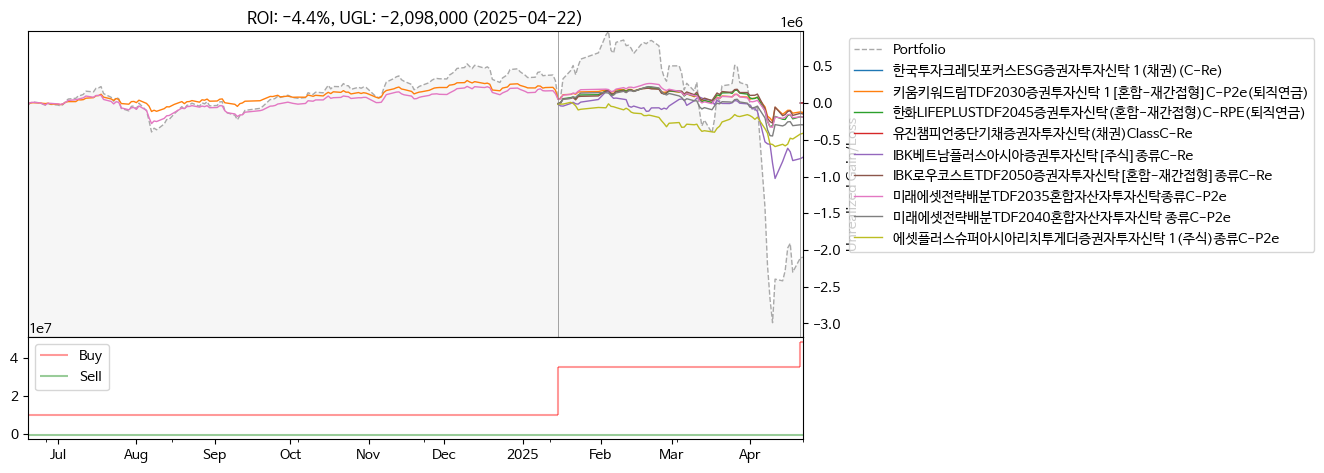

In [15]:
pf_tdf.plot(total=False, roi=False)

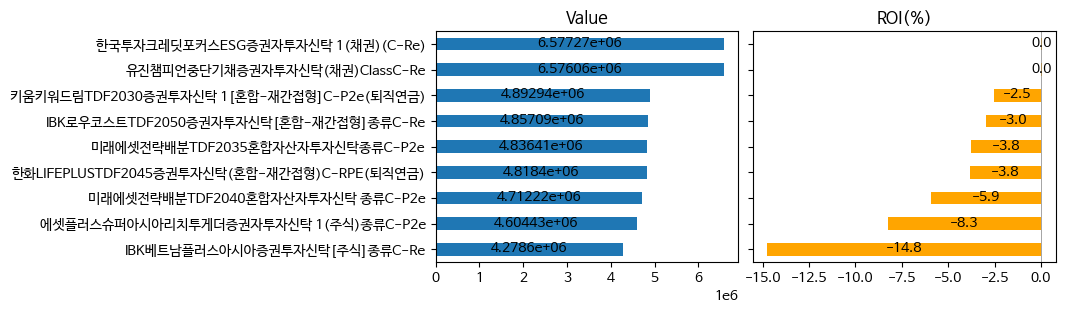

In [16]:
_ = pf_tdf.plot_assets(figsize=(8,3))

In [17]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)
#pf_tdf.valuate(date, total=False)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-04-22, 48148612, -103070, 46153435, -2098247, -0.04357855602182159


start    2024-06-19
end      2025-04-22
buy      48,148,612
sell       -103,070
value    46,153,435
ugl      -2,098,247
roi       -0.043579
dtype: object

In [51]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [ ]:
# new buy
date_actual='2024-04-17'
kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    buy = {'K55214CD4825': 6574306, 'K55101BV9571':6574306}
)
#_ = pf_tdf.transaction_halt(**kw) 

In [ ]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

In [60]:
pf_tdf.view_record()

name  ratio  \
date       ticker                                                             
2024-06-19 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
2025-01-15 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
2025-04-21 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55206C95800      5000000  5000000  0.5000    0.500 2024-06-19  
           K55301BU6139      5000000  5000000  0.5000    0.500 2024-06-19  
2025-01-15 K55206C95800            0  5077506  0.1429    0.144 2025-01-15  
           K55213C50702      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234BY9966      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234DF3150      5000000  5000000  0.1429    0.142 2025-01-15  
           K55301BU6139            0  5077009  0.1429    0.144 2025-01-15  
           K55301BU6253      5000000  5000000  0.1429    0.142 2025-01-15  
           K55364CF7048      5000000  5000000  0.1429    0.142 2025-01-15  
2025-04-21 K55101BV9571      6574306  6574306     NaN    0.142 2025-04-21  
           K55206C95800            0  4899682  0.1429    0.106 2024-04-17  
           K55213C50702            0  4823143  0.1429    0.105 2024-04-17  
           K55214CD4825      6574306  6574306     NaN    0.142 2025-04-21  
           K55234BY9966            0  4260709  0.1429    0.092 2024-04-17  
           K55234DF3150            0  4865649  0.1429    0.105 2024-04-17  
           K55301BU6139            0  4837744  0.1429    0.105 2024-04-17  
           K55301BU6253            0  4712837  0.1429    0.102 2024-04-17  
           K55364CF7048            0  4595360  0.1429    0.100 2024-04-17

## HANA

In [33]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [34]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

34 securities from 2023-03-29 to 2025-04-22 uploaded.
Master data for 264 funds loaded.
Price data loaded
Cost data transaction_cost_250411.csv loaded
Transaction record to 2024-08-01 loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [35]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

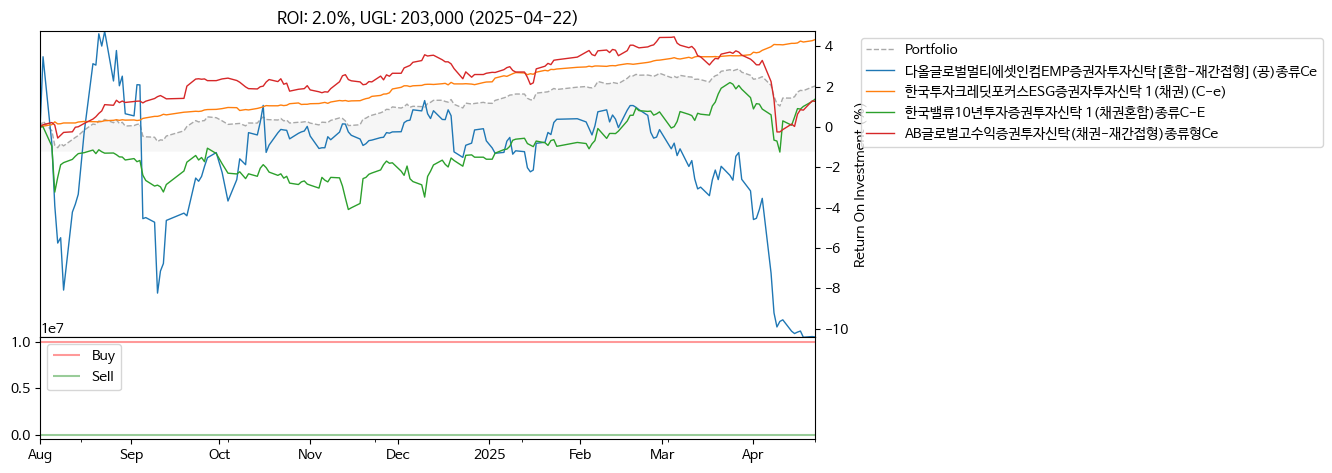

In [36]:
pf_hana.plot(total=False, roi=True)

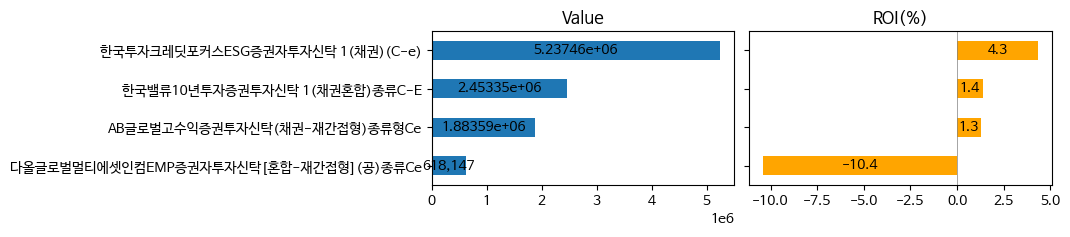

In [37]:
_ = pf_hana.plot_assets(figsize=(8,2), roi=True)

In [19]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-04-17, 9990000, 0.0, 10170781, 180781, 0.01809619619619629


start    2024-08-01
end      2025-04-17
buy       9,990,000
sell            0.0
value    10,170,781
ugl         180,781
roi        0.018096
dtype: object

In [20]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [21]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

4 tickers selected by Selected from 2023-04-17 to 2025-04-17
Weights of tickers determined by Inv.Vol.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: 1.2%, UGL: 140,465 (2025-04-17)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-04-17 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-04-17 K55306CV9946      -217402   402756  0.0396    0.040 2025-04-17  
           KR5101888398      1420535  6653812  0.6542    0.654 2025-04-17  
           KR5236AS4826     -1060218  1381207  0.1358    0.136 2025-04-17  
           KR5370AP9956      -142916  1733003  0.1704    0.170 2025-04-17

## SAVE
연금저축

In [38]:
pf = 'SAVE_2503'
#pf = 'SAVE_2504'

In [39]:
kw_st = dict(
    security_names = fund_names
)

In [40]:
pf_save = PM.create_portfolio(pf, **kw_st, **kw_cost)
pf_save.view_record()

34 securities from 2023-03-29 to 2025-04-22 uploaded.
Master data for 264 funds loaded.
Price data loaded
Cost data transaction_cost_250411.csv loaded
Transaction record to 2025-03-17 loaded


name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13

In [23]:
#pf_save.portfolio_data['strategy']
#pf_save.cost
#pf_save.get_names()
#pf_save.update_record()

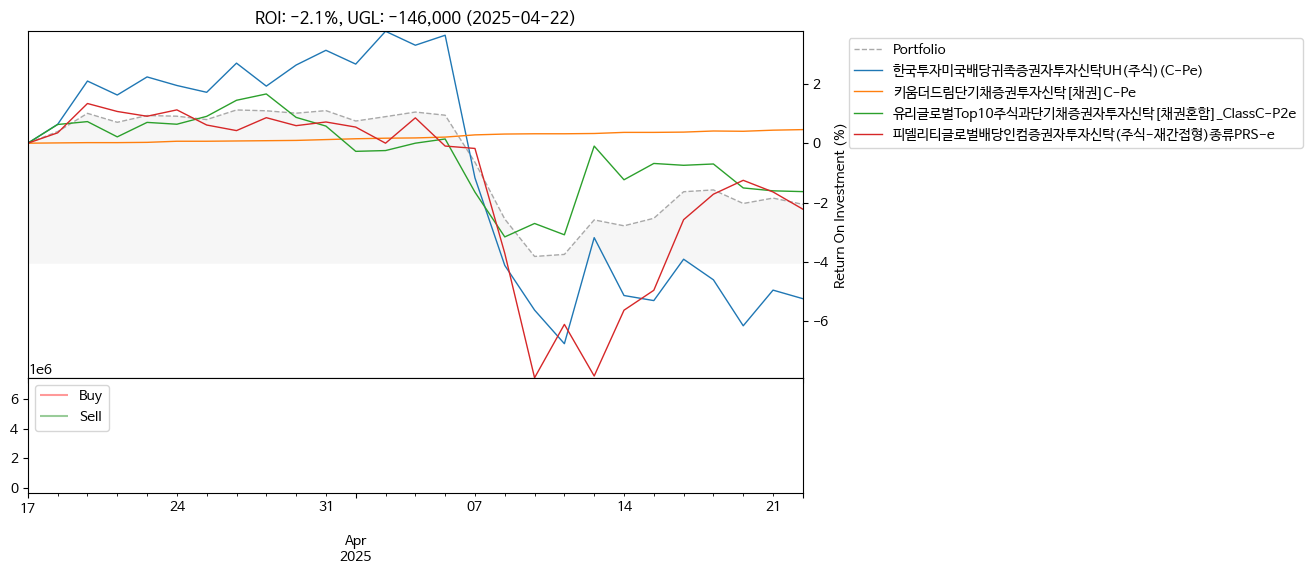

In [41]:
pf_save.plot(total=False, roi=True)

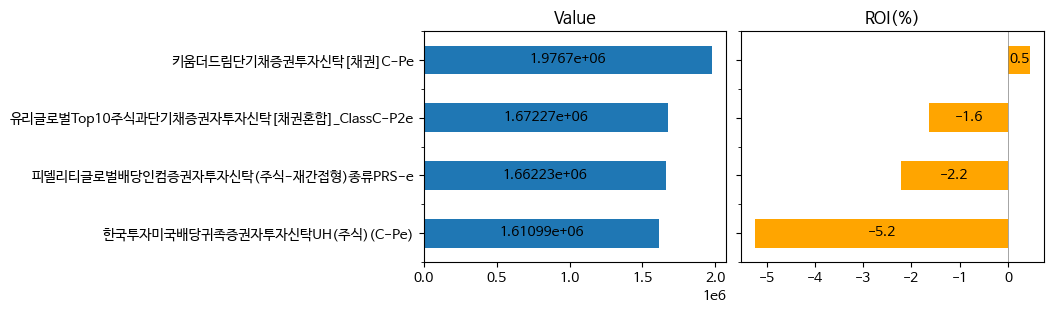

In [42]:
_ = pf_save.plot_assets(figsize=(8,3))

In [26]:
date = None
pf_save.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-04-21, 2025-04-22, 3584916, 0.0, 3585788, 872.0, 0.00024324140370368674


start    2025-04-21
end      2025-04-22
buy       3,584,916
sell            0.0
value     3,585,788
ugl           872.0
roi        0.000243
dtype: object

In [17]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [27]:
date_actual='2024-04-17'

# new buy
#capital = {'K55107BU0252':2000000, 'K55214B30803':1584916}

capital = WidgetTransaction.values(1)

In [28]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = capital,
    date_actual = date_actual
)
_ = pf_save.transaction_pipeline(**kwargs)
pf_save.view_record()

2 tickers selected by Selected from 2024-10-22 to 2025-04-22
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: 0.0%, UGL: 844.7527020242997 (2025-04-22)
Set save=True to save transaction record


name  ratio  transaction  \
date       ticker                                                               
2025-04-21 K55107BU0252  우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1      2000000   
           K55214B30803      유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1      1584916   
2025-04-22 K55107BU0252  우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1      -207833   
           K55214B30803      유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1       207833   

                             net  weight  weight*      date*  
date       ticker                                             
2025-04-21 K55107BU0252  2000000  0.5579    0.558 2025-04-21  
           K55214B30803  1584916  0.4421    0.442 2025-04-21  
2025-04-22 K55107BU0252  1792894  0.5000    0.500 2024-04-17  
           K55214B30803  1792894  0.5000    0.500 2024-04-17

## FISA

In [17]:
kw_st = dict(
    method_select = 'selected'    
)

In [18]:
pf_fisa = PM.create_portfolio('FISA_2504', **kw_st, **kw_cost)
pf_fisa.view_record()

23 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-29 loaded


name  ratio  \
date       ticker                                                       
2025-04-28 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
2025-04-29 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-04-28 K55107BB0404     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5101888398     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5236AS4818      3000000   3000000  0.0968    0.130 2024-04-25  
2025-04-29 K55107BB0404            0  10000934  0.3226    0.323 2024-04-25  
           K55210CO3737      5000000   5000000     NaN    0.161 2025-04-25  
           KR5101888398            0  10000000  0.3226    0.323 2024-04-25  
           KR5236AS4818            0   2990013  0.0968    0.096 2024-04-25  
           KR5370AP9949      3000000   3000000     NaN    0.097 2025-04-25

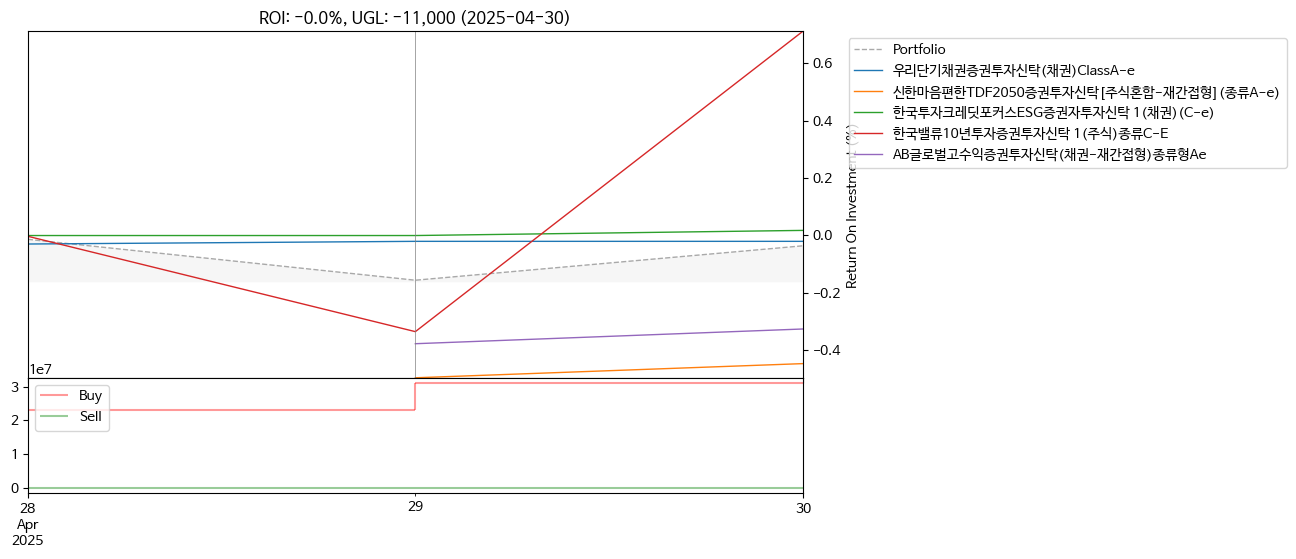

In [20]:
pf_fisa.plot(total=False, roi=True)

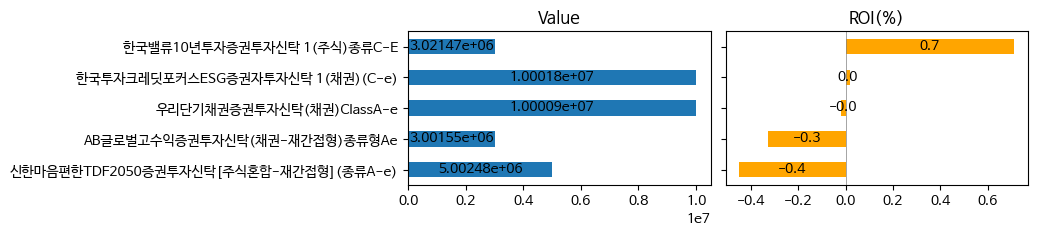

In [21]:
_ = pf_fisa.plot_assets(figsize=(8,2), roi=True)

In [22]:
date = None
pf_fisa.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-04-28, 2025-04-30, 31039400, -251.58804036214462, 31028228, -11424, -0.0003680350792980569


start    2025-04-28
end      2025-04-30
buy      31,039,400
sell     -251.58804
value    31,028,228
ugl         -11,424
roi       -0.000368
dtype: object

In [23]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [14]:
date_actual='2024-04-25'

# new buy
tickers = ['K55210CO3737','KR5370AP9949']
capital = [5e6, 3e6]
capital = dict(zip(tickers, capital))

kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    buy = capital
)

_ = pf_fisa.transaction_halt(**kw) 
pf_fisa.view_record()

ERROR: No transaction record exits
ERROR: No transaction record


In [16]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = WidgetTransaction.values(1),
    #date_actual = date_actual
)
_ = pf_fisa.transaction_pipeline(**kwargs)

23 tickers selected by All from 2024-10-30 to 2025-04-30
Weights of tickers determined by Equal weights.
ERROR: Neither capital nor tickers to rebalance exists


## TEST

In [41]:
tkrs = ['K55303CK1428', 'KR5207AW8081']

In [42]:
PM.review_portfolio('TDF_2406',strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally', 'unit_fund': True}

In [43]:
kw_st = dict(
    tickers = tkrs,
    file = 'pf_test'
)
pf_test = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)

288 securities from 2023-03-27 to 2025-04-23 uploaded.
Master data for 300 funds loaded.
Price data loaded
Cost data transaction_cost_250424.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [45]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [50]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_test.transaction_pipeline(**kwargs)
pf_test.view_record()

2 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.7%, UGL: 168,854 (2025-04-23)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2025-01-31 K55303CK1428                마이다스우량채권증권자투자신탁 1(채권)Ce      1   
           KR5207AW8081  교보악사Tomorrow장기우량증권투자신탁K -1(채권)ClassCE      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55303CK1428      5000000  5000000     0.5      0.5 2025-01-31  
           KR5207AW8081      5000000  5000000     0.5      0.5 2025-01-31

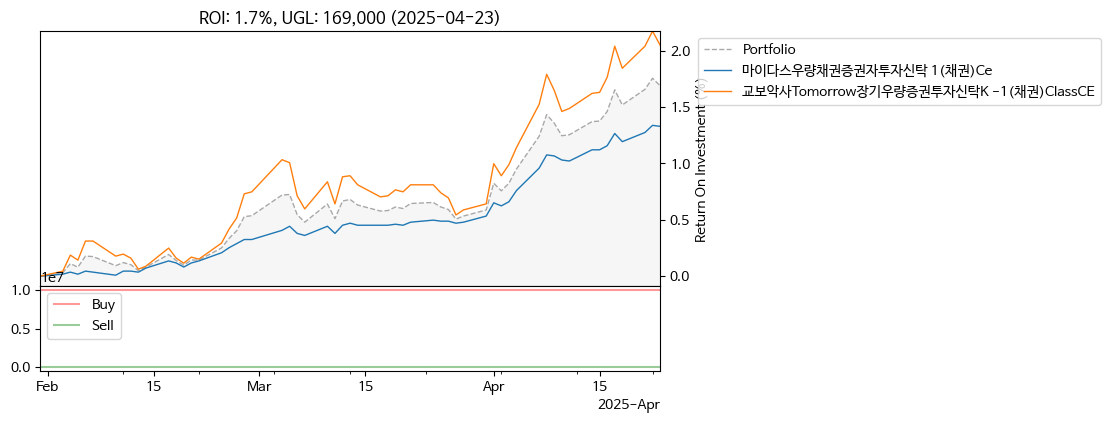

In [51]:
pf_test.plot(total=False, roi=True, figsize=(8,5))

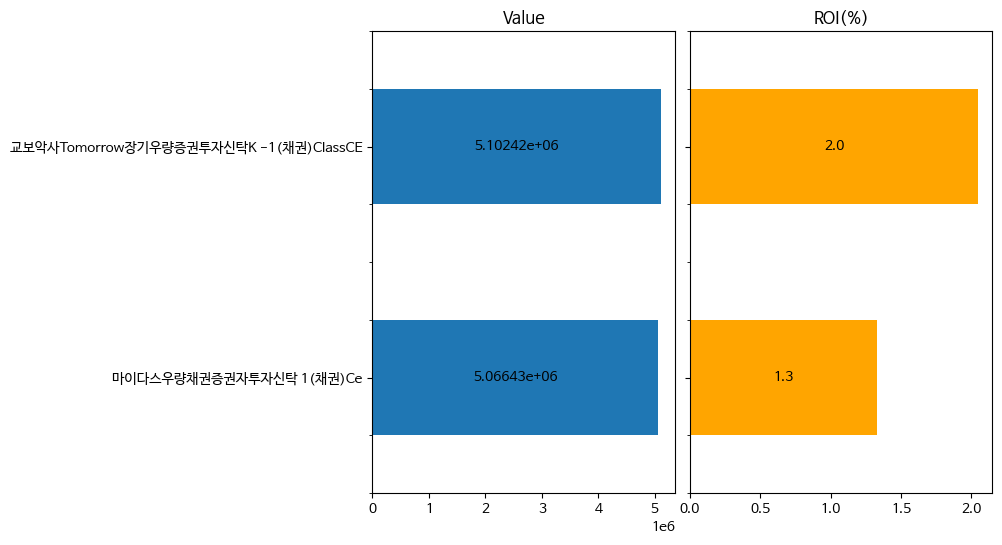

In [52]:
_ = pf_test.plot_assets(figsize=(8,6))

# testing

In [24]:
import pandas as pd

In [26]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, verbose=True)

TDF_2406:
23 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded
Transaction record to 2025-04-21 loaded

HANA_2408:
23 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded
Transaction record to 2024-08-01 loaded

SAVE_2503:
23 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded
Transaction record to 2025-03-17 loaded

SAVE_2504:
23 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded
Transaction record to 2025-04-21 loaded

FISA_2504:
23 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded
Transaction record to 2025-04-29 loaded



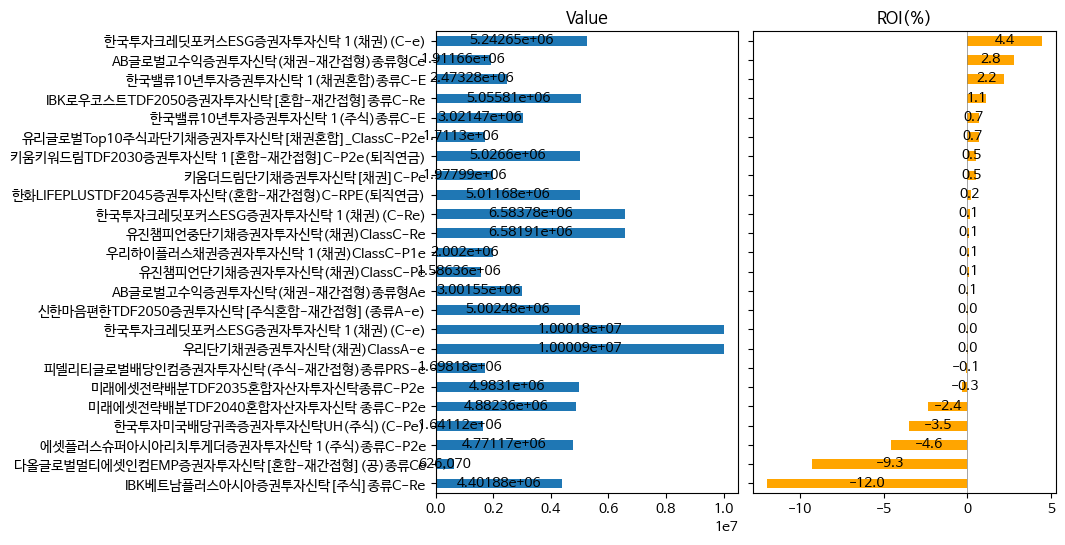

In [27]:
pm.assets(plot=True, sort_by='roi', roi=True, figsize=(8,6))

In [17]:
df = pm.assets(plot=False)
sr = df['name'].sort_values()

In [28]:
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_cat.columns

Index(['name', 'seller', 'account', 'manager', 'asset', 'strategy', 'region'], dtype='object')

In [37]:
df.join(df_cat.iloc[:, 1:]).groupby('strategy')[['value']].sum()

,value
strategy,
EMP,626070
ESG,15244443
TDF,29962034
단기,21858499
배당,3339291
주식,12194521
채권,15972265
